In [1]:
df <- read.csv('Clothing.csv')

In [2]:
head(df)

tsale,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
750000,4411.765,41,1,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,1984
1926395,4280.878,39,2,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,1972
1250000,4166.667,40,1,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,1952
694227,2670.104,40,1,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,1966
750000,15000.000,44,2,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,1996
400000,4444.444,41,2,1.9556,1.2833,1.3673,72,10.89885,22207.04,22859.85,90,1947


In [12]:
mean(df$tsale)

[1] 833584.2

In [13]:
median(df$tsale)

[1] 694227

In [6]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [14]:
getmode(df$tsale)

[1] 976817

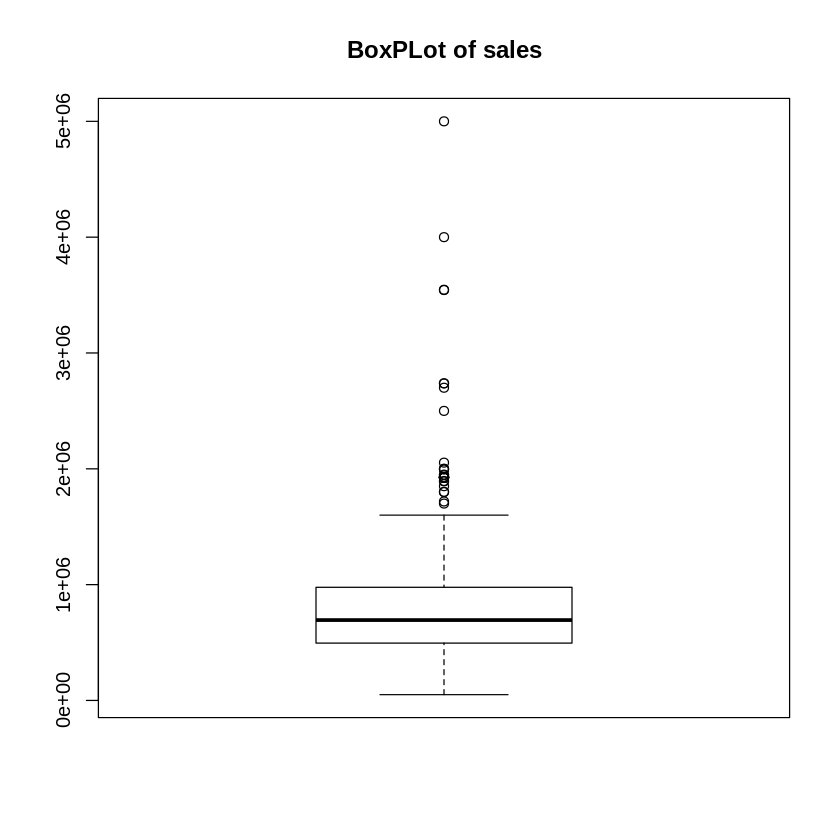

In [15]:
boxplot(df$tsale, main="BoxPLot of sales")

In [11]:
cor(df$hoursw,df$tsale)

[1] 0.7091963

In [16]:
 linearModel <- lm(tsale ~ hoursw,data = df)

In [17]:
print(linearModel)


Call:
lm(formula = tsale ~ hoursw, data = df)

Coefficients:
(Intercept)       hoursw  
      55664         6422  



In [18]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.8*nrow(df))  # row indices for training data
trainingData <- df[trainingRowIndex, ]  # model training data
testData  <- df[-trainingRowIndex, ]   # test data

In [19]:
lmMod <- lm(tsale ~ hoursw, data=trainingData)  # build the model
distPred <- predict(lmMod, testData) 

In [20]:
actuals_preds <- data.frame(cbind(actuals=testData$tsale, predicteds=distPred))

In [23]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max)) 

In [24]:
min_max_accuracy

[1] 0.736533